In [ ]:
## Quick Look at gender splits

In [1]:
%%time
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

Toggle code

Wall time: 43.4 s


In [2]:
BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

In [117]:
f2f_harmonised

,dataset,uid,housing_det,housing,inc,vote,year,wt,age,vote_simple,bloc,birth_year,harmonised_voted,inc_det,vote_complete,vote_complete_simple,bloc_complete,turnout_complete,gender,gender_complete
index,,,,,,,,,,,,,,,,,,,,
0,2019,2019|0,MORT,OWN,15.6-26k,DNV,2019,0.926940,34.0,DNV,Neither,1985.0,0.0,5.0,DNV,DNV,Neither,DNV,1.0,1.0
1,2019,2019|1,RENT-PR,RENT,NaN,DNV,2019,NaN,45.0,DNV,Neither,1974.0,0.0,3.0,DNV,DNV,Neither,DNV,1.0,1.0
2,2019,2019|2,MORT,OWN,26-36.4k,LAB,2019,0.920836,33.0,LAB,Left-Lib,1986.0,1.0,7.0,LAB,LAB,Left-Lib,VOTED,1.0,1.0
3,2019,2019|3,RENT-LA,RENT,0-15.6k,DNV,2019,1.197730,22.0,DNV,Neither,1997.0,0.0,3.0,DNV,DNV,Neither,DNV,1.0,1.0
4,2019,2019|4,RENT-LA,RENT,NaN,DNV,2019,1.979724,35.0,DNV,Neither,1984.0,0.0,6.0,DNV,DNV,Neither,DNV,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,1959,1959|2917,OWN-MORT,OWN,NaN,TY,1959,1.000000,14.0,NaN,NaN,1945.0,NaN,4.0,TY,DK,NaN,CNV,1.0,1.0
2918,1959,1959|2918,OWN-MORT,OWN,NaN,TY,1959,1.000000,19.0,NaN,NaN,1940.0,NaN,3.0,TY,DK,NaN,CNV,1.0,1.0
2919,1959,1959|2919,OWN-MORT,OWN,NaN,TY,1959,1.000000,13.0,NaN,NaN,1946.0,NaN,2.0,TY,DK,NaN,CNV,1.0,1.0


In [129]:
df = f2f_harmonised[["dataset","bloc_complete","gender_complete","wt","gender","vote_complete_simple"]]#.groupby(["dataset","bloc_complete"]).apply(lambda x: x["gender_complete"]*x["wt"]/len(x))

In [22]:
df.groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt"])/len(x)  )

dataset   bloc_complete
1959      Left-Lib         0.490269
          Neither          0.541147
          Right-Auth       0.586785
1964      Left-Lib              NaN
          Neither               NaN
          Right-Auth            NaN
1966      Left-Lib              NaN
          Neither               NaN
          Right-Auth            NaN
1970      Left-Lib              NaN
          Neither               NaN
          Right-Auth            NaN
1974_feb  Left-Lib         0.514925
          Neither          0.564784
          Right-Auth       0.529340
1974_oct  Left-Lib         0.491752
          Neither          0.509859
          Right-Auth       0.519178
1979      Left-Lib         0.503555
          Neither          0.506993
          Right-Auth       0.537037
1983      Left-Lib         0.529610
          Neither          0.499817
          Right-Auth       0.534073
1987      Left-Lib         0.518437
          Neither          0.506800
          Right-Auth       0.526199
1992

In [26]:
df.dropna().groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt"])/len(x)  )

dataset   bloc_complete
1959      Left-Lib         0.490269
          Neither          0.541147
          Right-Auth       0.586785
1964      Left-Lib         0.531229
          Neither          0.605759
          Right-Auth       0.599418
1966      Left-Lib         0.515539
          Neither          0.548289
          Right-Auth       0.571558
1970      Left-Lib         0.544513
          Neither          0.573300
          Right-Auth       0.541401
1974_feb  Left-Lib         0.514925
          Neither          0.564784
          Right-Auth       0.529340
1974_oct  Left-Lib         0.491752
          Neither          0.509859
          Right-Auth       0.519178
1979      Left-Lib         0.503555
          Neither          0.506993
          Right-Auth       0.537037
1983      Left-Lib         0.529610
          Neither          0.499817
          Right-Auth       0.534073
1987      Left-Lib         0.518437
          Neither          0.506800
          Right-Auth       0.526199
1992

In [30]:
df.dropna().groupby(["dataset","bloc_complete"])["gender_complete"].mean()

dataset   bloc_complete
1959      Left-Lib         0.490269
          Neither          0.578554
          Right-Auth       0.588757
1964      Left-Lib         0.502818
          Neither          0.581152
          Right-Auth       0.574964
1966      Left-Lib         0.491543
          Neither          0.539924
          Right-Auth       0.552194
1970      Left-Lib         0.521891
          Neither          0.589041
          Right-Auth       0.535461
1974_feb  Left-Lib         0.514925
          Neither          0.564784
          Right-Auth       0.529340
1974_oct  Left-Lib         0.491752
          Neither          0.509859
          Right-Auth       0.519178
1979      Left-Lib         0.503555
          Neither          0.506993
          Right-Auth       0.537037
1983      Left-Lib         0.534254
          Neither          0.503030
          Right-Auth       0.528658
1987      Left-Lib         0.521173
          Neither          0.504638
          Right-Auth       0.524567
1992

In [32]:
df.dropna().groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender"]*x["wt"])/len(x)  )

dataset   bloc_complete
1959      Left-Lib         0.487348
          Neither          0.538071
          Right-Auth       0.587065
1964      Left-Lib         0.525829
          Neither          0.607937
          Right-Auth       0.601466
1966      Left-Lib         0.510011
          Neither          0.553668
          Right-Auth       0.573476
1970      Left-Lib         0.544185
          Neither          0.573131
          Right-Auth       0.544840
1974_feb  Left-Lib         0.514925
          Neither          0.564784
          Right-Auth       0.529340
1974_oct  Left-Lib         0.491752
          Neither          0.509859
          Right-Auth       0.519178
1979      Left-Lib         0.503555
          Neither          0.506993
          Right-Auth       0.537037
1983      Left-Lib         0.529610
          Neither          0.499817
          Right-Auth       0.534073
1987      Left-Lib         0.518437
          Neither          0.506800
          Right-Auth       0.526199
1992

In [29]:
df.dropna().groupby(["dataset","bloc_complete"]).count()

gender_complete    wt
dataset  bloc_complete                       
1959     Left-Lib                  1079  1079
         Neither                    401   401
         Right-Auth                1014  1014
1964     Left-Lib                   887   887
         Neither                    191   191
         Right-Auth                 687   687
1966     Left-Lib                   946   946
         Neither                    263   263
         Right-Auth                 661   661
1970     Left-Lib                   571   571
         Neither                    219   219
         Right-Auth                 564   564
1974_feb Left-Lib                  1340  1340
         Neither                    301   301
         Right-Auth                 818   818
1974_oct Left-Lib                  1273  1273
         Neither                    355   355
         Right-Auth                 730   730
1979     Left-Lib                   844   844
         Neither                    286   286
         Right-Auth                 756   756
1983     Left-Lib                  1810  1810
         Neither                    660   660
         Right-Auth                1483  1483
1987     Left-Lib                  1842  1842
         Neither                    539   539
         Right-Auth                1445  1445
1992     Left-Lib                  1755  1755
         Neither                    467   467
         Right-Auth                1303  1303
1997     Left-Lib                  1967  1967
         Neither                    609   609
         Right-Auth                 775   775
2001     Left-Lib                  1614  1614
         Neither                    827   827
         Right-Auth                 559   559
2005     Left-Lib                  2104  2104
         Neither                   1088  1088
         Right-Auth                 933   933
2010     Left-Lib                  1454  1454
         Neither                    684   684
         Right-Auth                 926   926
2015     Left-Lib                   985   985
         Neither                    740   740
         Right-Auth                1026  1026
2017     Left-Lib                   924   924
         Neither                    451   451
         Right-Auth                 688   688
2019     Left-Lib                  1440  1440
         Neither                    712   712
         Right-Auth                1329  1329

In [25]:
df.groupby(["dataset","bloc_complete"]).apply(lambda x: x["wt"].isnull().sum())

dataset   bloc_complete
1959      Left-Lib           0
          Neither            0
          Right-Auth         0
1964      Left-Lib         506
          Neither          314
          Right-Auth       333
1966      Left-Lib         310
          Neither          163
          Right-Auth       574
1970      Left-Lib         438
          Neither          395
          Right-Auth       734
1974_feb  Left-Lib           0
          Neither            0
          Right-Auth         0
1974_oct  Left-Lib           0
          Neither            0
          Right-Auth         0
1979      Left-Lib           0
          Neither            0
          Right-Auth         0
1983      Left-Lib           0
          Neither            0
          Right-Auth         0
1987      Left-Lib           0
          Neither            0
          Right-Auth         0
1992      Left-Lib           0
          Neither            0
          Right-Auth         0
1997      Left-Lib          60
          Neith

In [19]:
df["wt"] = df["wt"].fillna(df["wt"].mean())

In [20]:
df.groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt"])/len(x)  )

dataset   bloc_complete
1959      Left-Lib         0.490269
          Neither          0.541147
          Right-Auth       0.586785
1964      Left-Lib         0.521648
          Neither          0.556764
          Right-Auth       0.587766
1966      Left-Lib         0.514643
          Neither          0.554285
          Right-Auth       0.577789
1970      Left-Lib         0.495149
          Neither          0.570104
          Right-Auth       0.552076
1974_feb  Left-Lib         0.514925
          Neither          0.564784
          Right-Auth       0.529340
1974_oct  Left-Lib         0.491752
          Neither          0.509859
          Right-Auth       0.519178
1979      Left-Lib         0.503555
          Neither          0.506993
          Right-Auth       0.537037
1983      Left-Lib         0.529610
          Neither          0.499817
          Right-Auth       0.534073
1987      Left-Lib         0.518437
          Neither          0.506800
          Right-Auth       0.526199
1992

In [ ]:
2019      Left-Lib         0.425627
          Neither          0.939548
          Right-Auth       0.368805
        
# something to do with the weights???

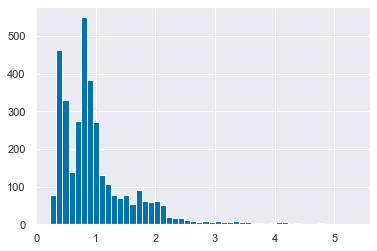

In [40]:
df[df["dataset"]=="2019"]["wt"].hist(bins=50)

In [41]:
df[df["dataset"]=="2019"]["wt"].min()

0.23773235443793728

In [44]:
df[df["dataset"]=="2019"].dropna().groupby(["dataset","bloc_complete","gender_complete"]).count()

wt  gender
dataset bloc_complete gender_complete             
2019    Left-Lib      0.0              656     656
                      1.0              781     781
        Neither       0.0              286     286
                      1.0              425     425
        Right-Auth    0.0              689     689
                      1.0              633     633

In [45]:
df.columns

Index(['dataset', 'bloc_complete', 'gender_complete', 'wt', 'gender'], dtype='object')

In [48]:
df.loc[df["dataset"]=="2019",['dataset', 'bloc_complete', 'gender_complete',  'gender']].dropna().groupby(["dataset","bloc_complete","gender_complete"]).count()

gender
dataset bloc_complete gender_complete        
2019    Left-Lib      0.0                 718
                      1.0                 876
        Neither       0.0                 330
                      1.0                 481
        Right-Auth    0.0                 743
                      1.0                 728

In [50]:
BES_df_list["2019"]

,finalserialno,agency,Y10A,Y10B1,Y10B2,Y10B3,Y10B4,Y10B5,a01,a01_code,...,ns_sec,ns_sec_analytic,edlevel,pano,wt_demog,wt_vote,wt_demog_f2f,wt_vote_f2f,wt_demog_cses,wt_vote_cses
0,10102,Ipsos,NaN,NaN,NaN,NaN,NaN,NaN,-2,NaN,...,4.1,2,Undergraduate,75,0.530641,0.926940,0.648923,1.011936,0.493209,1.083466
1,10103,NaN,2.0,Yes,No,No,No,No,NaN,NaN,...,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN
2,10105,NaN,2.0,Yes,No,No,No,No,NaN,NaN,...,4.1,2,Postgrad,75,1.061282,0.920836,NaN,NaN,0.986419,0.898993
3,10110,Ipsos,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,...,14.1,8,No qualifications,75,0.762602,1.197730,0.794949,1.161902,NaN,NaN
4,10111,Ipsos,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,...,12.1,6,Below GCSE,75,1.274022,1.979724,1.494537,2.152356,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,90006,Ipsos,NaN,NaN,NaN,NaN,NaN,NaN,nhs,Health,...,2.0,1.1,Postgrad,591,0.329159,0.624600,0.249559,0.476609,0.303666,0.670711
3942,90007,NaN,1.0,Yes,No,No,No,No,NaN,NaN,...,4.1,2,GCSE,591,0.451256,0.323303,NaN,NaN,0.492782,0.328191
3943,90008,NaN,2.0,Yes,No,No,No,No,NaN,NaN,...,2.0,1.1,Postgrad,591,0.658318,NaN,NaN,NaN,0.607333,NaN
3944,90009,Ipsos,NaN,NaN,NaN,NaN,NaN,NaN,wealth equality,Inequality,...,4.1,2,Below GCSE,591,0.961090,0.658389,0.798204,0.460203,0.986190,0.625718


In [79]:
{k:v for k,v in BES_label_list['2019'].items() if "gender" in v.lower()}

{'y09': 'Gender', 'Q23_CSES': 'Gender(cses)'}

In [80]:
BES_df_list['2019']['y09'][ df.loc[df["dataset"]=="2019","bloc_complete"]=="Neither" ].value_counts()

Female               481
Male                 331
Prefer not to say     10
In another way         1
Not stated             0
Name: y09, dtype: int64

In [81]:
{k:v for k,v in BES_label_list['2019'].items() if "weight" in v.lower()}

{'wt_sel_wt': 'Selection weight including capping (all modes)',
 'wt_demog': 'VEP demographic weight (all modes)',
 'wt_vote': 'VEP self-reported vote weight (all modes)',
 'wt_demog_f2f': 'VEP demographic weight (face-to-face only)',
 'wt_vote_f2f': 'VEP Self-reported vote weight (face-to-face only)',
 'wt_demog_cses': 'VEP demographic weight (CSES only)',
 'wt_vote_cses': 'VEP self-reported vote weight (CSES only)'}

In [82]:
df['wt_demog'] = BES_df_list['2019']['wt_demog']

0       0.530641
1            NaN
2       1.061282
3       0.762602
4       1.274022
          ...   
3941    0.329159
3942    0.451256
3943    0.658318
3944    0.961090
3945    0.852693
Name: wt_demog, Length: 3946, dtype: float64

In [90]:
# df['wt_demog']


In [97]:
df.loc[df["dataset"]=="2019","wt_demog"] = BES_df_list['2019']['wt_demog']
df['wt_updated'] = df[['wt','wt_demog']].fillna(method='ffill',axis=1)['wt_demog']

In [69]:
df.dropna().groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt"])/sum(x["wt"])  )

dataset   bloc_complete
1959      Left-Lib         0.483936
          Neither          0.574648
          Right-Auth       0.584682
1964      Left-Lib         0.507823
          Neither          0.604651
          Right-Auth       0.581345
1966      Left-Lib         0.496635
          Neither          0.569263
          Right-Auth       0.553371
1970      Left-Lib         0.540162
          Neither          0.605456
          Right-Auth       0.524738
1974_feb  Left-Lib         0.510400
          Neither          0.575972
          Right-Auth       0.536458
1974_oct  Left-Lib         0.493220
          Neither          0.514970
          Right-Auth       0.516643
1979      Left-Lib         0.513924
          Neither          0.505703
          Right-Auth       0.540960
1983      Left-Lib         0.534642
          Neither          0.508455
          Right-Auth       0.525653
1987      Left-Lib         0.520872
          Neither          0.507044
          Right-Auth       0.519412
1992

In [70]:
df.dropna().groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt_demog"])/sum(x["wt_demog"])  )

dataset   bloc_complete
1959      Left-Lib         0.486302
          Neither          0.581041
          Right-Auth       0.576952
1964      Left-Lib         0.508765
          Neither          0.583976
          Right-Auth       0.557524
1966      Left-Lib         0.477945
          Neither          0.513420
          Right-Auth       0.530058
1970      Left-Lib         0.528206
          Neither          0.606566
          Right-Auth       0.503745
1974_feb  Left-Lib         0.508789
          Neither          0.550753
          Right-Auth       0.526386
1974_oct  Left-Lib         0.503142
          Neither          0.525517
          Right-Auth       0.523484
1979      Left-Lib         0.517592
          Neither          0.539540
          Right-Auth       0.541176
1983      Left-Lib         0.539067
          Neither          0.514088
          Right-Auth       0.515579
1987      Left-Lib         0.526944
          Neither          0.503463
          Right-Auth       0.523413
1992

In [110]:
bloc_year_gensplit = df.drop("wt_demog",axis=1).dropna().groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt_updated"])/sum(x["wt_updated"])  )
bloc_year_gensplit

dataset   bloc_complete
1959      Left-Lib         0.487348
          Neither          0.572973
          Right-Auth       0.588235
1964      Left-Lib         0.508791
          Neither          0.594413
          Right-Auth       0.587511
1966      Left-Lib         0.498894
          Neither          0.563236
          Right-Auth       0.564441
1970      Left-Lib         0.531597
          Neither          0.603318
          Right-Auth       0.538166
1974_feb  Left-Lib         0.514925
          Neither          0.564784
          Right-Auth       0.529340
1974_oct  Left-Lib         0.491752
          Neither          0.509859
          Right-Auth       0.519178
1979      Left-Lib         0.503555
          Neither          0.506993
          Right-Auth       0.537037
1983      Left-Lib         0.533762
          Neither          0.501856
          Right-Auth       0.528022
1987      Left-Lib         0.521452
          Neither          0.504275
          Right-Auth       0.523358
1992

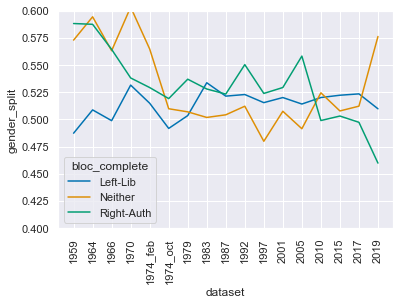

In [116]:
bloc_year_gensplit = bloc_year_gensplit.reset_index()
bloc_year_gensplit.columns = ['dataset', 'bloc_complete', 'gender_split']

sns.lineplot(data=bloc_year_gensplit,x="dataset",hue="bloc_complete",y="gender_split");
plt.ylim([.4,.6]);
plt.xticks(rotation=90);

In [ ]:
### pretty noisy

## maybe try to replicate their chart with just LAB and CON?

In [139]:
df.loc[df["dataset"]=="2019","wt_demog"] = BES_df_list['2019']['wt_demog']
df['wt_updated'] = df[['wt','wt_demog']].fillna(method='ffill',axis=1)['wt_demog']
vote_year_gensplit = df.drop("wt_demog",axis=1).dropna().groupby(["dataset","vote_complete_simple"]).apply(lambda x: sum(x["gender_complete"]*x["wt_updated"])/sum(x["wt_updated"])  )
vote_year_gensplit

dataset  vote_complete_simple
1959     CON                     0.588235
         DNV                     0.572973
         LAB                     0.483971
         LD                      0.520000
1964     CON                     0.587511
                                   ...   
2019     LAB                     0.544789
         LD                      0.463507
         PC                      0.707109
         REFUK                   0.411624
         SNP                     0.345896
Length: 116, dtype: float64

In [131]:
vote_year_gensplit.tail(50)

dataset  vote_complete_simple
1997     PC                      0.476146
         REFUK                   0.294699
         SNP                     0.493867
2001     CON                     0.529378
         DNV                     0.507530
         GP                      0.341348
         LAB                     0.509751
         LD                      0.554315
         PC                      0.615085
         SNP                     0.485889
2005     CON                     0.571741
         DNV                     0.491471
         GP                      0.418386
         LAB                     0.522579
         LD                      0.506430
         PC                      0.532804
         REFUK                   0.365900
         SNP                     0.453483
2010     CON                     0.511618
         DNV                     0.524490
         GP                      0.672103
         LAB                     0.500313
         LD                      0.544057
    

In [132]:
df["vote_complete_simple"].value_counts()

CON      17150
LAB      16387
DNV       9997
LD        6381
SNP       1147
DK         599
REFUK      525
GP         281
PC         264
Name: vote_complete_simple, dtype: int64

In [133]:
replace_dict = {"SNP":np.nan,"DK":np.nan,"REFUK":np.nan,"GP":np.nan,"PC":np.nan}
df["vote_complete_simple"].replace(replace_dict).value_counts()

CON    17150
LAB    16387
DNV     9997
LD      6381
Name: vote_complete_simple, dtype: int64

In [140]:
vote_year_gensplit = vote_year_gensplit.reset_index()
vote_year_gensplit["vote_complete_simple"] = vote_year_gensplit["vote_complete_simple"].replace(replace_dict)
vote_year_gensplit.columns = ['dataset', 'vote_complete_simple', 'gender_split']
vote_year_gensplit.dropna()

,dataset,vote_complete_simple,gender_split
0,1959,CON,0.588235
1,1959,DNV,0.572973
2,1959,LAB,0.483971
3,1959,LD,0.520000
4,1964,CON,0.587511
...,...,...,...
104,2017,LD,0.444181
108,2019,CON,0.461169
109,2019,DNV,0.576292
111,2019,LAB,0.544789


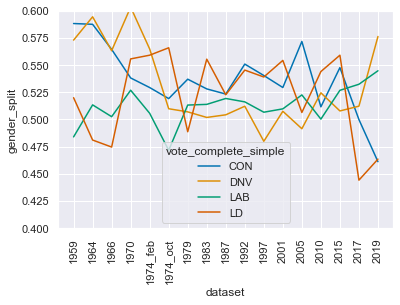

In [141]:
sns.lineplot(data=vote_year_gensplit,x="dataset",hue="vote_complete_simple",y="gender_split");
plt.ylim([.4,.6]);
plt.xticks(rotation=90);

In [142]:
df

,dataset,bloc_complete,gender_complete,wt,gender,vote_complete_simple,wt_demog,wt_updated
index,,,,,,,,
0,2019,Neither,1.0,0.926940,1.0,DNV,0.530641,0.530641
1,2019,Neither,1.0,NaN,1.0,DNV,NaN,NaN
2,2019,Left-Lib,1.0,0.920836,1.0,LAB,1.061282,1.061282
3,2019,Neither,1.0,1.197730,1.0,DNV,0.762602,0.762602
4,2019,Neither,1.0,1.979724,1.0,DNV,1.274022,1.274022
...,...,...,...,...,...,...,...,...
2917,1959,NaN,1.0,1.000000,1.0,DK,NaN,1.000000
2918,1959,NaN,1.0,1.000000,1.0,DK,NaN,1.000000
2919,1959,NaN,1.0,1.000000,1.0,DK,NaN,1.000000


In [ ]:
## try for limited age range - 20-40

In [150]:
df = f2f_harmonised[["dataset","bloc_complete","gender_complete","wt","gender","vote_complete_simple","age"]]

In [151]:
mask = (df["age"]>=20)&(df["age"]<=50)
df = df[mask]

In [152]:
df.loc[df["dataset"]=="2019","wt_demog"] = BES_df_list['2019']['wt_demog']
df['wt_updated'] = df[['wt','wt_demog']].fillna(method='ffill',axis=1)['wt_demog']
vote_year_gensplit = df.drop("wt_demog",axis=1).dropna().groupby(["dataset","vote_complete_simple"]).apply(lambda x: sum(x["gender_complete"]*x["wt_updated"])/sum(x["wt_updated"])  )
vote_year_gensplit

dataset  vote_complete_simple
1959     CON                     0.586919
         DNV                     0.558935
         LAB                     0.471049
         LD                      0.524590
1964     CON                     0.605013
                                   ...   
2019     LAB                     0.574704
         LD                      0.493592
         PC                      0.754582
         REFUK                   0.625432
         SNP                     0.322783
Length: 114, dtype: float64

In [153]:
df.drop("wt_demog",axis=1).dropna().groupby(["dataset","vote_complete_simple"]).count()

bloc_complete  gender_complete   wt  gender  \
dataset vote_complete_simple                                                
1959    CON                             582              582  582     582   
        DNV                             279              279  279     279   
        LAB                             639              639  639     639   
        LD                               61               61   61      61   
1964    CON                             339              339  339     339   
...                                     ...              ...  ...     ...   
2019    LAB                             482              482  482     482   
        LD                              154              154  154     154   
        PC                                9                9    9       9   
        REFUK                            12               12   12      12   
        SNP                              60               60   60      60   

                              age  wt_updated  
dataset vote_complete_simple                   
1959    CON                   582         582  
        DNV                   279         279  
        LAB                   639         639  
        LD                     61          61  
1964    CON                   339         339  
...                           ...         ...  
2019    LAB                   482         482  
        LD                    154         154  
        PC                      9           9  
        REFUK                  12          12  
        SNP                    60          60  

[114 rows x 6 columns]

In [147]:
vote_year_gensplit = vote_year_gensplit.reset_index()
vote_year_gensplit["vote_complete_simple"] = vote_year_gensplit["vote_complete_simple"].replace(replace_dict)
vote_year_gensplit.columns = ['dataset', 'vote_complete_simple', 'gender_split']
vote_year_gensplit.dropna()

,dataset,vote_complete_simple,gender_split
0,1959,CON,0.604972
1,1959,DNV,0.556650
2,1959,LAB,0.447689
3,1959,LD,0.512821
4,1964,CON,0.540598
...,...,...,...
102,2017,LD,0.310574
106,2019,CON,0.528877
107,2019,DNV,0.645168
109,2019,LAB,0.577358


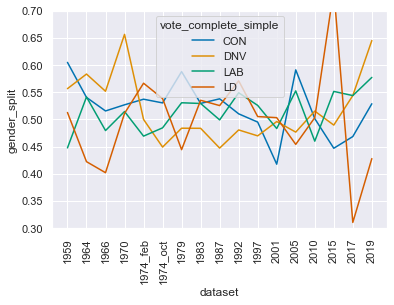

In [149]:
sns.lineplot(data=vote_year_gensplit,x="dataset",hue="vote_complete_simple",y="gender_split");
plt.ylim([.3,.7]);
plt.xticks(rotation=90);

In [154]:
bloc_year_gensplit = df.drop("wt_demog",axis=1).dropna().groupby(["dataset","bloc_complete"]).apply(lambda x: sum(x["gender_complete"]*x["wt_updated"])/sum(x["wt_updated"])  )
bloc_year_gensplit = bloc_year_gensplit.reset_index()
bloc_year_gensplit.columns = ['dataset', 'bloc_complete', 'gender_split']

dataset   bloc_complete
1959      Left-Lib         0.475714
          Neither          0.558935
          Right-Auth       0.586919
1964      Left-Lib         0.515734
          Neither          0.561313
          Right-Auth       0.605013
1966      Left-Lib         0.481455
          Neither          0.551617
          Right-Auth       0.552493
1970      Left-Lib         0.510655
          Neither          0.554136
          Right-Auth       0.558827
1974_feb  Left-Lib         0.505025
          Neither          0.516304
          Right-Auth       0.501253
1974_oct  Left-Lib         0.498688
          Neither          0.478632
          Right-Auth       0.511429
1979      Left-Lib         0.502000
          Neither          0.486772
          Right-Auth       0.533333
1983      Left-Lib         0.538578
          Neither          0.481185
          Right-Auth       0.523233
1987      Left-Lib         0.506177
          Neither          0.467001
          Right-Auth       0.517925
1992

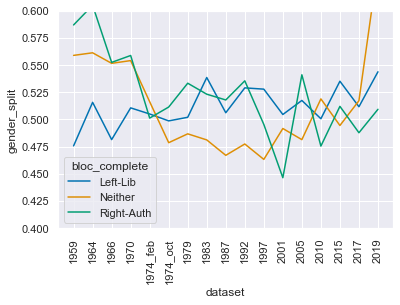

In [155]:
sns.lineplot(data=bloc_year_gensplit,x="dataset",hue="bloc_complete",y="gender_split");
plt.ylim([.4,.6]);
plt.xticks(rotation=90);